In [2]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sp
import numpy as np


In [3]:
data = pd.read_csv('f:/sql interveiw/Superstore Dataset.csv')

In [4]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [5]:
df = data.copy()

In [6]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [7]:
df.Country.value_counts()

United States    9994
Name: Country, dtype: int64

In [8]:
df.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [9]:
df.groupby(['State', 'Ship Mode'])['Profit'].sum()

State      Ship Mode     
Alabama    First Class       1634.8148
           Same Day             7.2500
           Second Class      2127.1661
           Standard Class    2017.5944
Arizona    First Class       -802.5980
                               ...    
Wisconsin  First Class       1323.7382
           Same Day            58.0692
           Second Class      1287.1943
           Standard Class    5732.7987
Wyoming    Standard Class     100.1960
Name: Profit, Length: 176, dtype: float64

In [10]:
pd.crosstab(index= df['Ship Mode'] ,columns=df['State'],normalize=True)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Ship Mode,,,,,,,,,,,,,,,,,,,,,
First Class,0.000901,0.004203,0.001001,0.032219,0.004403,0.001901,0.001801,0.0000,0.005403,0.002201,...,0.000200,0.002201,0.014409,0.000400,0.000000,0.005003,0.006804,0.0000,0.001201,0.0000
Same Day,0.000100,0.001601,0.000200,0.011907,0.000600,0.001001,0.000200,0.0000,0.002802,0.001501,...,0.000000,0.000200,0.004803,0.000200,0.000000,0.000500,0.003902,0.0001,0.000700,0.0000
Second Class,0.001801,0.002702,0.001001,0.039524,0.003302,0.001101,0.001601,0.0003,0.006704,0.003102,...,0.000100,0.002502,0.019111,0.001901,0.000100,0.004303,0.010506,0.0000,0.001501,0.0000
Standard Class,0.003302,0.013908,0.003802,0.116570,0.009906,0.004203,0.006004,0.0007,0.023414,0.011607,...,0.000901,0.013408,0.060236,0.002802,0.001001,0.012608,0.029418,0.0003,0.007605,0.0001


In [11]:
pd.crosstab(columns= df['Ship Mode'] ,index=df['State'],values=df['Profit'] , aggfunc=sum)

Ship Mode,First Class,Same Day,Second Class,Standard Class
State,,,,
Alabama,1634.8148,7.2500,2127.1661,2017.5944
Arizona,-802.5980,141.7095,-151.5379,-2615.4982
Arkansas,632.4793,58.4284,424.9932,2892.7862
California,12397.8882,5594.6111,14762.8831,43626.0047
Colorado,-1290.8187,49.9453,-65.3823,-5221.6022
Connecticut,570.6647,463.8963,883.8836,1593.0472
Delaware,864.6658,78.3350,454.7871,8579.5869
District of Columbia,NaN,NaN,48.2928,1011.2965
Florida,-83.7921,331.8017,540.0689,-4187.3802


In [12]:
df.groupby(df['State'])['Profit'].sum()

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

In [13]:
count = df.groupby(df['State'])['Profit'].sum()

In [14]:
# get the name of satate that cause the loss  in profit we have get indeeper to know the reason for loss 
for  name, value in zip(count.index,count.values) :
    if value<0:
        print(name ,"        ",value)
    
      
 

Arizona          -3427.9246
Colorado          -6527.8579
Florida          -3399.3017
Illinois          -12607.887
North Carolina          -7490.912200000001
Ohio          -16971.3766
Oregon          -1190.4705
Pennsylvania          -15559.9603
Tennessee          -5341.6936
Texas          -25729.3563


In [15]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [16]:
df['revenue'] = df['Sales']*df['Quantity']

In [17]:
df.revenue

0         32.896
1         35.352
2        818.208
3          7.080
4         58.608
          ...   
9989       9.072
9990     158.328
9991     636.510
9992      27.808
9993    1292.544
Name: revenue, Length: 9994, dtype: float64

In [18]:
df['revenue_discount'] = df['revenue']*df['Discount']

In [19]:
df['revenue_discount']

0         6.5792
1         7.0704
2       163.6416
3         5.6640
4        11.7216
          ...   
9989      1.8144
9990     31.6656
9991      0.0000
9992      5.5616
9993    258.5088
Name: revenue_discount, Length: 9994, dtype: float64

In [20]:
df['revenue']-df['revenue_discount']

0         26.3168
1         28.2816
2        654.5664
3          1.4160
4         46.8864
          ...    
9989       7.2576
9990     126.6624
9991     636.5100
9992      22.2464
9993    1034.0352
Length: 9994, dtype: float64

In [21]:
df['Profit']

0        5.5512
1        4.2717
2      -64.7748
3       -5.4870
4        4.8840
         ...   
9989    -0.6048
9990    19.7910
9991     2.7279
9992     4.5188
9993    12.1176
Name: Profit, Length: 9994, dtype: float64

we sold with high price but something happened in profit we get nigative we have to know more data to find out where is the issue but i can consider the common reason that usually  cause that :

1 **margin of profit the cost of goods is expensive than the price sale**

2 **price stratigity that apply in this states if they have indiviual sterategty  or the company make one sterategty**  
**that apply for all stats that mean poor in the finaicial and we have develop more than one to apply diffrent areas**

3 **loss in inventory that happen in that stats**

5 **the final is the company branch have expense that pay once like they are rent bigger store or buy new equipment**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [24]:
df['Order Date'].dt.month_name()

0        January
1        January
2        January
3        January
4        January
          ...   
9989    December
9990    December
9991    December
9992    December
9993    December
Name: Order Date, Length: 9994, dtype: object

<AxesSubplot:xlabel='Order Date', ylabel='revenue'>

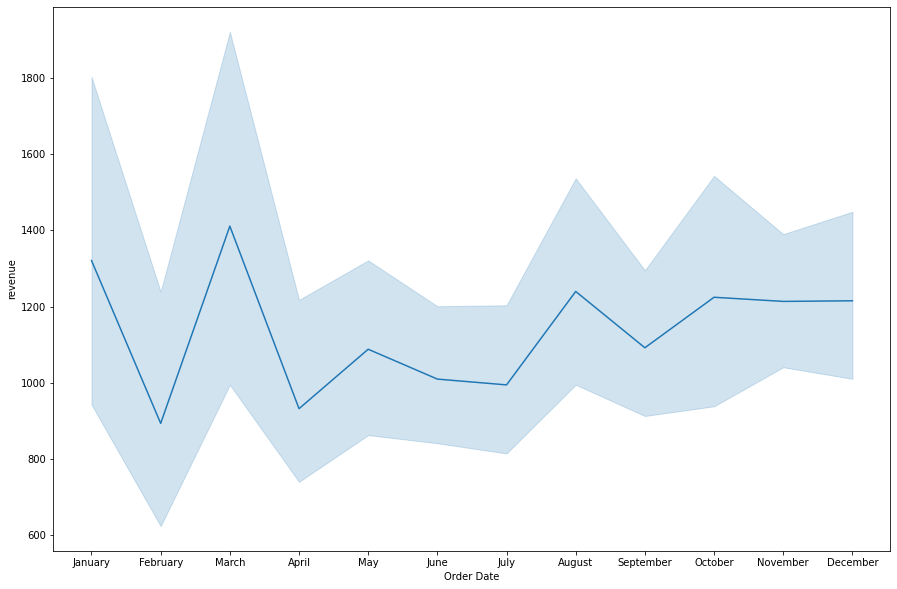

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Order Date'].dt.month_name() ,y = 'revenue',data = df , markers="o" )

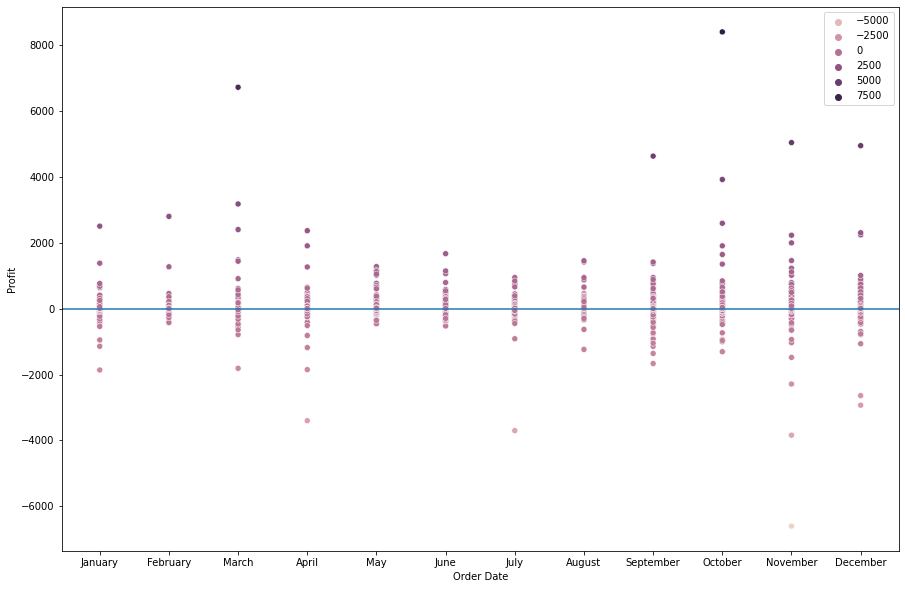

In [26]:
plt.figure(figsize=(15,10))

ax = sns.scatterplot(x=df['Order Date'].dt.month_name() , y = 'Profit',hue = 'Profit', data = df , markers="o")
ax.axhline(0)
plt.legend()
plt.show()

In [27]:
df.groupby(df['Order Date'].dt.month_name())['Profit'].sum().sort_values(ascending=False)

Order Date
December     42416.0829
September    36275.2327
November     35499.4790
October      32536.3976
March        28581.9690
August       22701.3920
May          22645.5630
June         20985.3168
July         13660.1540
April        11653.6597
February     10244.1127
January       9197.6623
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Order Date'>

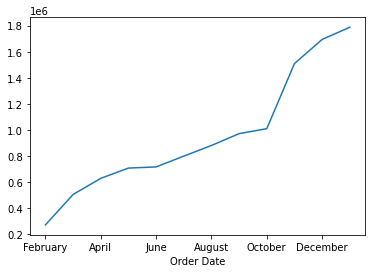

In [28]:
df.groupby(df['Order Date'].dt.month_name())['revenue'].sum().sort_values().plot()

the loss in profit don't appear in (monthly,quarter,yearly) revenue but it show more clearliy when we analysis the stats and the product as well

In [30]:
df['month'] = df['Order Date'].dt.month

In [31]:
df['month']

0        1
1        1
2        1
3        1
4        1
        ..
9989    12
9990    12
9991    12
9992    12
9993    12
Name: month, Length: 9994, dtype: int64

In [33]:
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,revenue,revenue_discount,month
9989,CA-2022-156720,2022-12-30,2023-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,9.072,1.8144,12
9990,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,158.328,31.6656,12
9991,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,636.510,0.0000,12
9992,CA-2022-115427,2022-12-30,2023-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,27.808,5.5616,12
9993,CA-2022-143259,2022-12-30,2023-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,1292.544,258.5088,12


In [35]:
df['year'] = df['Order Date'].dt.year

In [63]:
df.groupby(['month'])['Order ID'].count().max()

1473

In [71]:
np.arange(0,1473,100)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400])

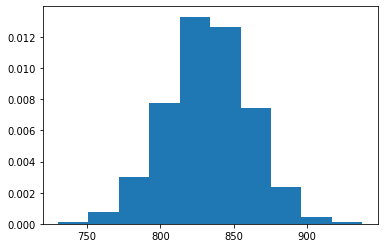

In [82]:
plt.hist(x = ss.poisson.rvs(size = 2000,mu = 832.84),density=True);

In [43]:
# the average of order per month 
np.mean(df.groupby(['month'])['Order ID'].count())

832.8333333333334

# the probaility to get 1000 order per month or more ? 

In [117]:
#p (x = 800) 800 order per month
ss.poisson.pmf(k= 800, mu = 833 )*100

0.7271323426707057

In [116]:
# p (x<8oo) less than 800  order per month
ss.poisson.cdf(k = 800, mu = 832.84 )*100

13.089284731668938

In [118]:
#p(x>800) greater than 800 order per month
(1-ss.poisson.cdf(k = 800, mu = 832.84 ))*100

86.91071526833106

diffrent time shipment

In [92]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [95]:
np.mean(df['Ship Date']- df['Order Date'])

Timedelta('3 days 22:58:28.505103061')

In [101]:
np.max(df['Ship Date']- df['Order Date'])

Timedelta('7 days 00:00:00')

In [125]:
# the probability of ship order take 10 days
ss.expon.pdf( x = 10,scale= 4)

0.0205212496559747

In [126]:
#more than 10 dayes 
ss.expon.cdf( x = 10,scale= 4)

0.9179150013761012

In [127]:
#more than 10 dayes 
1-ss.expon.cdf( x = 10,scale= 4)

0.08208499862389884

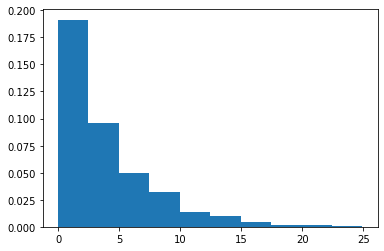

In [128]:
plt.hist(x= ss.expon.rvs( size = 1000 ,  scale = 4), density=True );